In [1]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.paths.parquet_paths import TIP
from data.paths.parquet_paths import REVIEW

In [2]:
review_df = pd.read_parquet(str(REVIEW))
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float32
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float32(1), int32(3), object(5)
memory usage: 5.3+ MB


In [3]:
tip_df = pd.read_parquet(str(TIP))
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   text              100000 non-null  object
 1   date              100000 non-null  object
 2   compliment_count  100000 non-null  int32 
 3   business_id       100000 non-null  object
 4   user_id           100000 non-null  object
dtypes: int32(1), object(4)
memory usage: 3.4+ MB


In [4]:
review_cut = review_df[['user_id', 'business_id', 'date', 'text', 'useful']]

tip_cut = tip_df[['user_id', 'business_id', 'date', 'text', 'compliment_count']]
tip_cut.columns = ['user_id', 'business_id', 'date', 'text', 'useful']

tips_and_reviews = pd.concat([review_cut, tip_cut])
tips_and_reviews['date'] = pd.to_datetime(tips_and_reviews['date'])

tips_and_reviews.sample(5)

,user_id,business_id,date,text,useful
37060,JgMb-_la1_BTYgMOBJtAHw,yfxDa8RFOvJPQh0rNtakHA,2009-09-27 09:18:13,"Good food, but got busy, now long wait;(",0
90551,s5hemOR2IxcW-0MYA6hGug,jgsiHIdUdgngrBPXtP6j8g,2011-08-09 21:47:47,Great price on quinoa!,0
50238,NI1y_HeHzEghpGuGjENMSQ,XSKvC2PfnTAXCAxGQDhOJQ,2015-05-12 00:00:00,"I am giving 4 stars, because the food is not s...",1
23291,Z24wWXLyJ9K1ftiHZrP8Sw,QnfAHUr5-HTiaA5-va3glQ,2014-10-14 00:00:00,Great pizza. Even better wings!! Only downfal...,1
36775,AOH1c-tLs2V3Ws4vCY9DMA,kGL6bJ4cZUKdiwyUmezgiw,2012-08-20 00:00:00,Small place with humble and friendly people.\n...,3


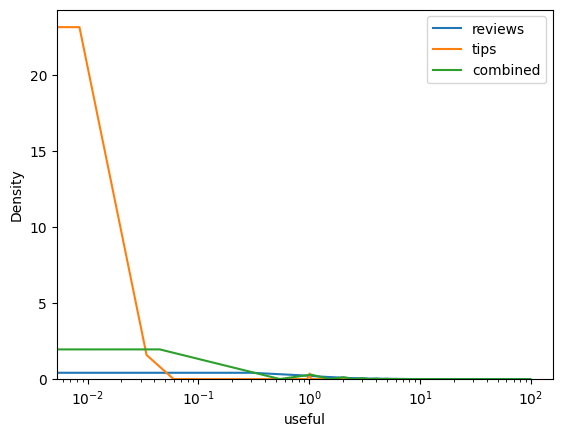

In [8]:
f, ax = plt.subplots()

for df, label  in zip([review_cut, tip_cut, tips_and_reviews],
                      ['reviews', 'tips', 'combined']):
    ax = sns.kdeplot(data=df, x='useful', label=label)
    
plt.legend()
plt.xscale('log')
plt.show()